In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets('MNIST_Data_Set/', one_hot = True)

In [ ]:
type(mnist)

In [ ]:
len(mnist.train.images)

In [ ]:
(mnist.train.images)[0]

In [ ]:
image1 = mnist.train.images[0].reshape(28, 28)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(image1, cmap = 'gist_gray')
plt.show()

In [ ]:
plt.imshow(mnist.train.images[1].reshape(784, 1), cmap = 'gist_gray', aspect = 0.004)
plt.show()

In [ ]:
mnist.train.images.shape

In [ ]:
mnist.train.images[1].shape

In [ ]:
plt.imshow(mnist.train.images[1].reshape(1, 784), aspect=99.9, cmap = 'gist_gray')

In [ ]:
plt.show()

# Placeholder

In [ ]:
xph = tf.placeholder(tf.float32, [None,784])

In [ ]:
y_true = tf.placeholder(tf.float32, [None, 10])

# Variable

In [ ]:
import numpy as np

In [ ]:
w = tf.Variable(tf.random_normal([784, 10]))

In [ ]:
b = tf.Variable(tf.random_normal([10]))

# Graph

In [ ]:
y_model = tf.matmul(xph, w) + b

# Loss Function

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_model))

# Optimizer

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.3)

In [ ]:
train = optimizer.minimize(cross_entropy)

# Variable initialiser

In [ ]:
init = tf.global_variables_initializer()

# saver model

In [ ]:
saver = tf.train.Saver()

# Session

In [ ]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(6000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {xph:batch_x, y_true:batch_y})
        
    pred = tf.equal(tf.argmax(y_model, 1), tf.argmax(y_true, 1))
    
    accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
    
    k = sess.run(accuracy, feed_dict = {xph:mnist.test.images, y_true:mnist.test.labels})
    
    saver.save(sess, 'ckpt/trained_model.ckpt')
print("Percentage accuracy: ",(k*100))

In [97]:
def printer(a, flag):
    with tf.Session() as sess:
        saver.restore(sess, 'ckpt/trained_model.ckpt');
        sess.run(init)
        
        #label = mnist.test.labels[a]
        predicted = sess.run(tf.argmax(y_model, 1)[a], feed_dict = {xph:mnist.test.images})
        label = sess.run(tf.argmax(y_true, 1)[a], feed_dict = {y_true:mnist.test.labels})
        #print('predicted value: ',predicted,'\n','label: ',label)
        
        if flag == 0:
            return 0
        
        while(flag):
            
            if predicted == label:
                plt.imshow(mnist.test.images[a].reshape(28,28))
                plt.show()
                print('predicted value: ',predicted,'\n','label: ',label,'\n')
                flag = 0
            printer(a, flag)   
            break

INFO:tensorflow:Restoring parameters from ckpt/trained_model.ckpt
INFO:tensorflow:Restoring parameters from ckpt/trained_model.ckpt
INFO:tensorflow:Restoring parameters from ckpt/trained_model.ckpt


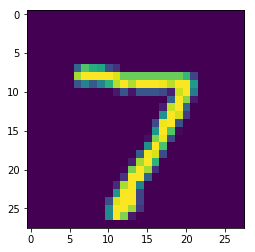

predicted value:  7 
 label:  7 

INFO:tensorflow:Restoring parameters from ckpt/trained_model.ckpt


In [98]:
printer(0, 1)